In [1]:
import numpy as np

dataset = 'data/conformers/'
#mol_names = ['1340', '2159', '3344', '3505']
mol_names = ['1340', '2159', '3344']

preds = np.load(dataset + 'coefficients.npy', allow_pickle=True).item()
adj = np.load(dataset + 'adjacencies.npy', allow_pickle=True).item()
dist = np.load(dataset + 'distances.npy', allow_pickle=True).item()

In [2]:
len(preds)

450

In [3]:
preds['1340_1']

array([[ 0.01703703,  0.00681011,  0.00717622, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.03456065,  0.01282101,  0.08867089, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00186604, -0.00326851,  0.01379561, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.01568826,  0.10219043,  0.465669  , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.018694  ,  0.10391088,  0.46041465, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.02653503,  0.09821355,  0.46072504, ...,  0.        ,
         0.        ,  0.        ]], shape=(19, 127), dtype=float32)

In [18]:
sum(sum(abs(preds['3344_1'] - preds['3344_35'])))

np.float32(42.825134)

In [4]:
import csv

rmsds = {}

for name in mol_names:
    with open(dataset + name + '_rmsd.csv') as file:
        reader = csv.DictReader(file, delimiter=',')
        for line in reader:
            idx = name + '_' + line['Index']
            rmsd = float(line['RMSD'])
            rmsds[idx] = rmsd

rmsds

{'1340_1': 0.0,
 '1340_2': 0.12760223005677732,
 '1340_3': 0.09184113941590455,
 '1340_4': 0.1490027026709483,
 '1340_5': 0.35578517458666364,
 '1340_6': 0.3472863361985715,
 '1340_7': 0.3066584147459131,
 '1340_8': 0.16518527774458625,
 '1340_9': 0.3531662620208974,
 '1340_10': 0.04632360764684812,
 '1340_11': 0.20666237755301228,
 '1340_12': 0.36383102037510967,
 '1340_13': 0.16462631236744668,
 '1340_14': 0.353141144517225,
 '1340_15': 0.35463953500370227,
 '1340_16': 0.08686683457126629,
 '1340_17': 0.3572604507411051,
 '1340_18': 0.17645702450072878,
 '1340_19': 0.3522735187145239,
 '1340_20': 0.05308522777578478,
 '1340_21': 0.3621911321991693,
 '1340_22': 0.06716012023909566,
 '1340_23': 0.3621184719911263,
 '1340_24': 0.05980028166899092,
 '1340_25': 0.3594354574071368,
 '1340_26': 0.3601603600649849,
 '1340_27': 0.35541294460772327,
 '1340_28': 0.0443074056986951,
 '1340_29': 0.09426298579577007,
 '1340_30': 0.15565778457576127,
 '1340_31': 0.3321424291076915,
 '1340_32': 0.10

In [5]:
for name in mol_names:
    if name + '_0' not in preds:
        if name in preds:
            preds[name + '_0'] = preds[name]
            adj[name + '_0'] = adj[name]
            dist[name + '_0'] = dist[name]
        else:
            preds[name + '_0'] = preds[name + '_1']
            adj[name + '_0'] = adj[name + '_1']
            dist[name + '_0'] = dist[name + '_1']


In [19]:
from tqdm import tqdm
from calc_gw_dist import calculate_gw_distance

gw_dist = {}
abs_diff = {}

for i in tqdm([ '_' + str(i) for i in range(1, 151)]):
    for name in mol_names:
        ref_id = name + '_0'
        queue_id = name + i
        gw_dist[queue_id] = calculate_gw_distance(preds[queue_id], dist[ref_id], preds[queue_id], dist[ref_id], alpha=0.5)
        abs_diff[queue_id] = sum(sum(abs(preds[queue_id] - preds[ref_id])))

gw_dist

100%|██████████| 150/150 [00:00<00:00, 527.80it/s]


{'1340_1': np.float64(-2.220446049250313e-16),
 '2159_1': np.float64(-5.329070518200751e-15),
 '3344_1': np.float64(-6.217248937900877e-15),
 '1340_2': np.float64(-6.661338147750939e-16),
 '2159_2': np.float64(-4.884981308350689e-15),
 '3344_2': np.float64(-6.217248937900877e-15),
 '1340_3': np.float64(-6.661338147750939e-16),
 '2159_3': np.float64(-3.552713678800501e-15),
 '3344_3': np.float64(-6.217248937900877e-15),
 '1340_4': np.float64(-2.220446049250313e-16),
 '2159_4': np.float64(-3.552713678800501e-15),
 '3344_4': np.float64(-7.105427357601002e-15),
 '1340_5': np.float64(-2.220446049250313e-16),
 '2159_5': np.float64(-3.9968028886505635e-15),
 '3344_5': np.float64(-7.549516567451064e-15),
 '1340_6': np.float64(-4.440892098500626e-16),
 '2159_6': np.float64(-4.440892098500626e-15),
 '3344_6': np.float64(-6.217248937900877e-15),
 '1340_7': np.float64(-4.440892098500626e-16),
 '2159_7': np.float64(-4.440892098500626e-15),
 '3344_7': np.float64(-7.105427357601002e-15),
 '1340_8': n

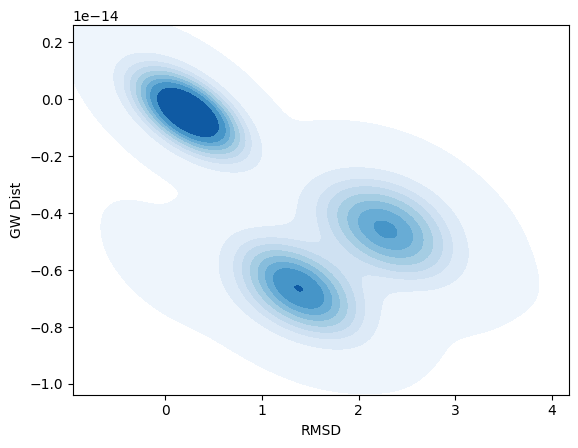

In [13]:
import seaborn as sns
from matplotlib import pyplot as plt

x = []
y = []
for key in rmsds:
    x.append(rmsds[key])
    y.append(gw_dist[key])

sns.kdeplot(x=x, y=y, fill=True, cmap="Blues", thresh=0.001)
plt.ylabel('GW Dist')
plt.xlabel('RMSD')
plt.show()

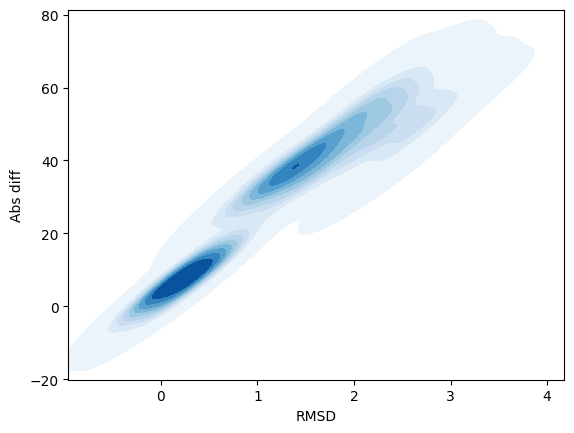

In [22]:
import seaborn as sns
from matplotlib import pyplot as plt

x = []
y = []
for key in rmsds:
    x.append(rmsds[key])
    y.append(abs_diff[key])

sns.kdeplot(x=x, y=y, fill=True, cmap="Blues", thresh=0.001)
plt.ylabel('Abs diff')
plt.xlabel('RMSD')
plt.show()

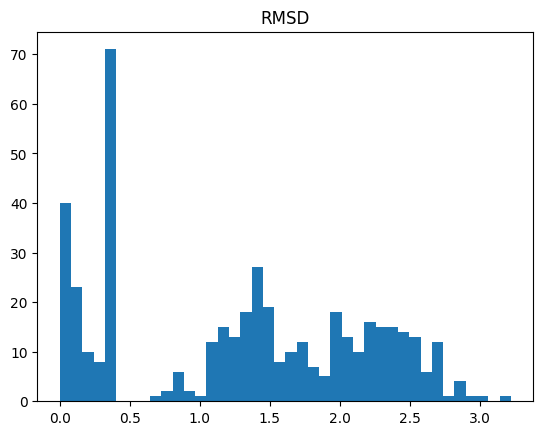

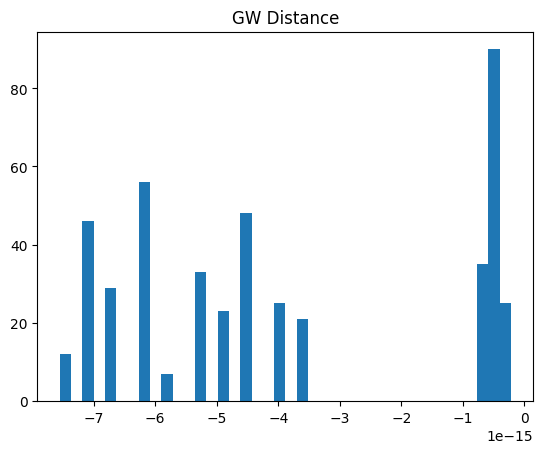

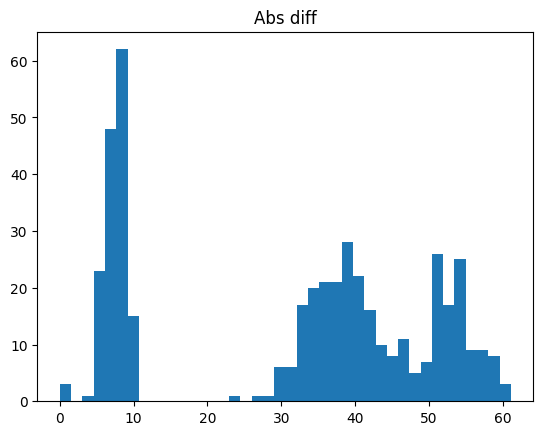

In [20]:
x = []
y = []
z = []
for key in rmsds:
    x.append(rmsds[key])
    y.append(gw_dist[key])
    z.append(abs_diff[key])


plt.hist(x, bins=40)
plt.title('RMSD')
plt.show()
plt.hist(y, bins=40)
plt.title('GW Distance')
plt.show()
plt.hist(z, bins=40)
plt.title('Abs diff')
plt.show()